In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### Dataset:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by:
P. Savicky
Institute of Computer Science, AS of CR
Czech Republic
savicky '@' cs.cas.cz

In [31]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [32]:
df["class"] = (df["class"] == "g").astype(int)

In [33]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


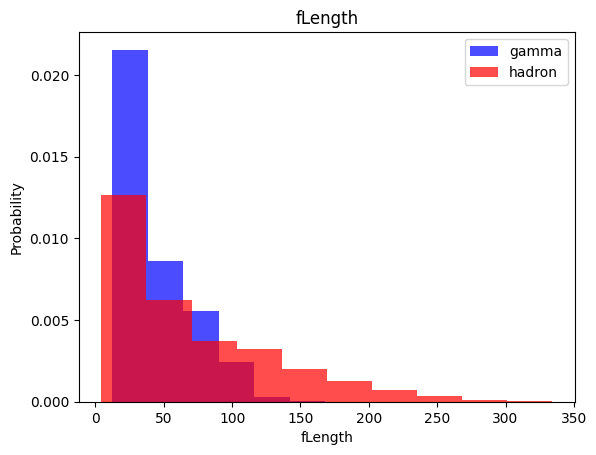

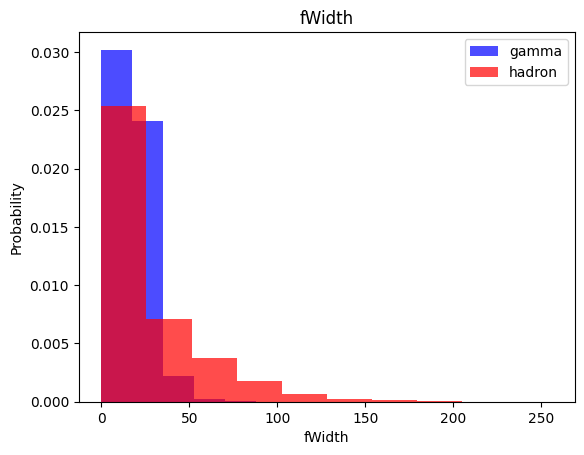

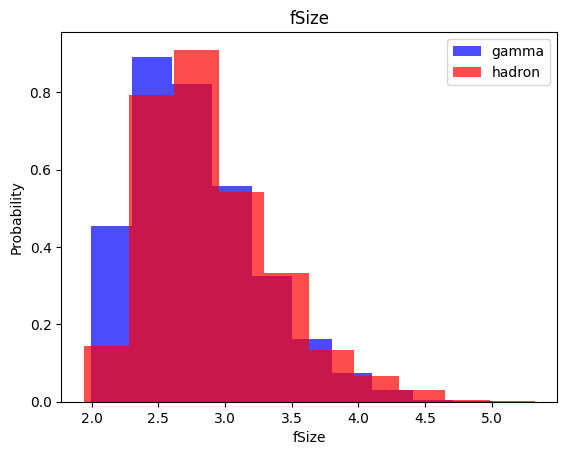

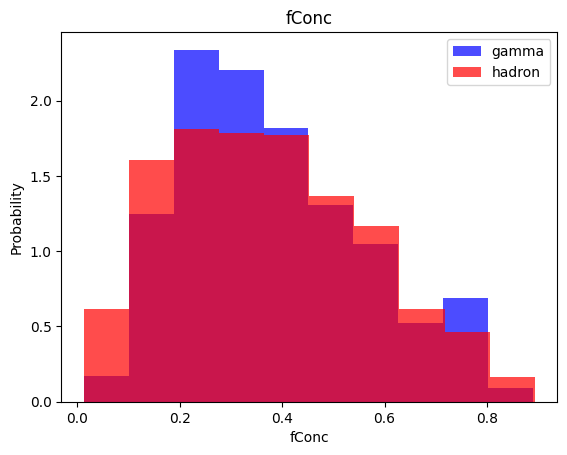

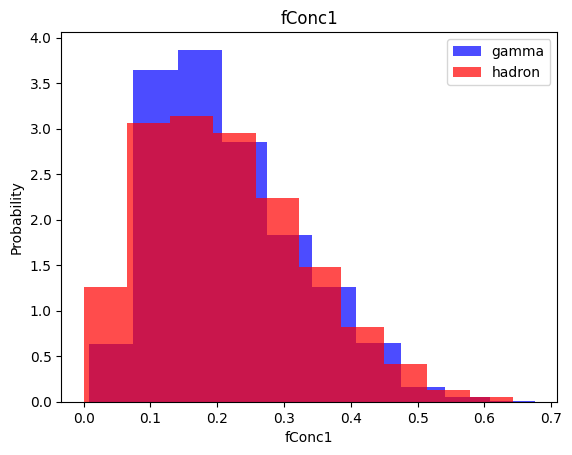

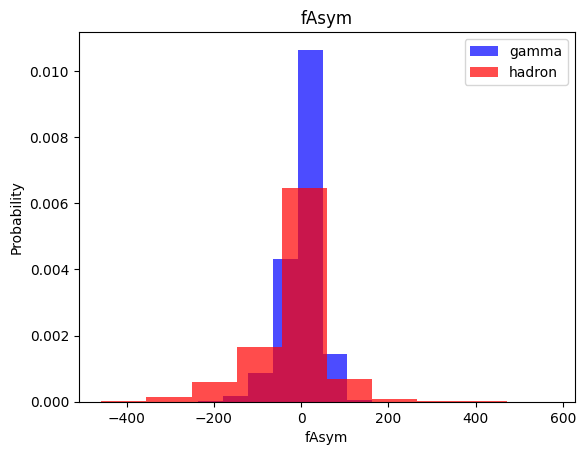

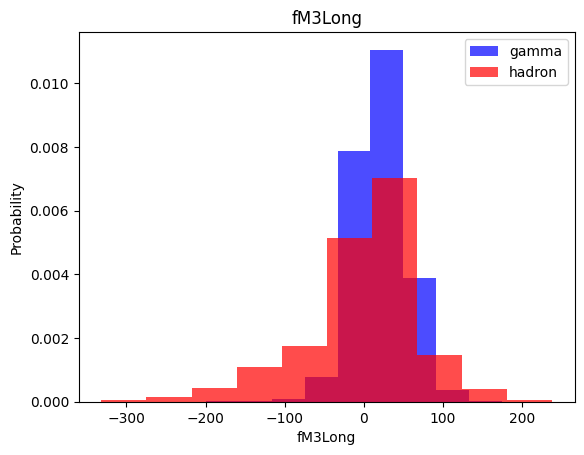

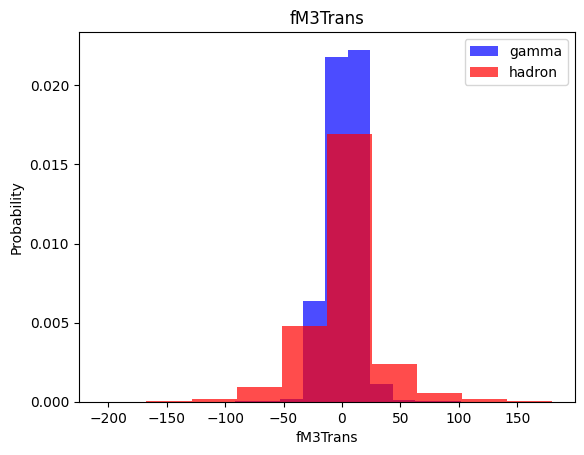

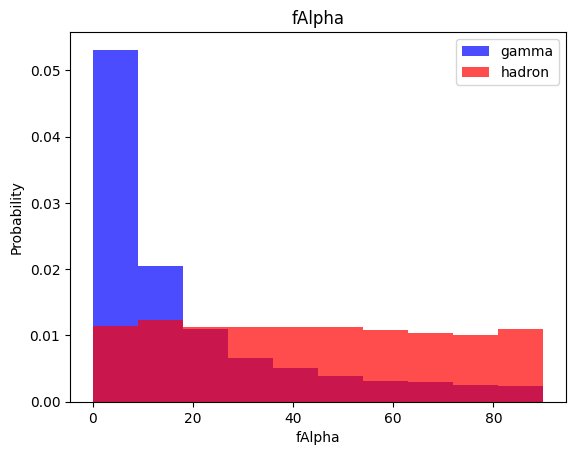

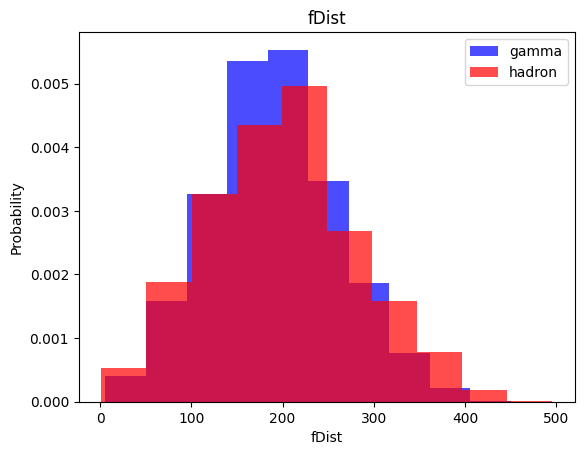

In [34]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, validation, test datasets

In [35]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [36]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [37]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [38]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# kNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [40]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
y_pred = knn_model.predict(X_test)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1367
           1       0.85      0.85      0.85      2437

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [45]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.41      0.53      1367
           1       0.73      0.91      0.81      2437

    accuracy                           0.73      3804
   macro avg       0.73      0.66      0.67      3804
weighted avg       0.73      0.73      0.71      3804



# Log Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [48]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1367
           1       0.84      0.83      0.83      2437

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# SVM

In [49]:
from sklearn.svm import SVC

In [50]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [51]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1367
           1       0.89      0.90      0.90      2437

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Net

In [52]:
import tensorflow as tf

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


In [53]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [54]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


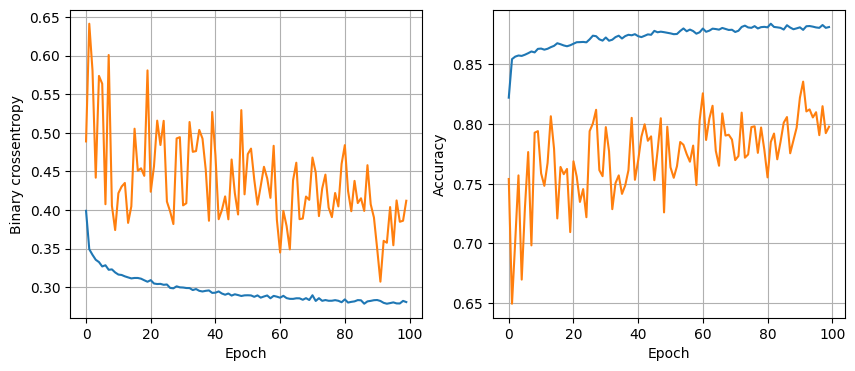

119/119 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 0.8712
16 nodes, dropout 0, lr 0.01, batch size 64


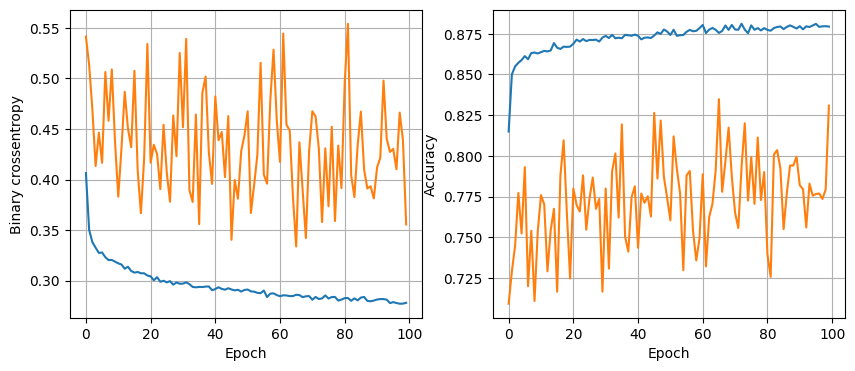

119/119 [==============================] - 0s 2ms/step - loss: 0.3604 - accuracy: 0.8567
16 nodes, dropout 0, lr 0.01, batch size 128


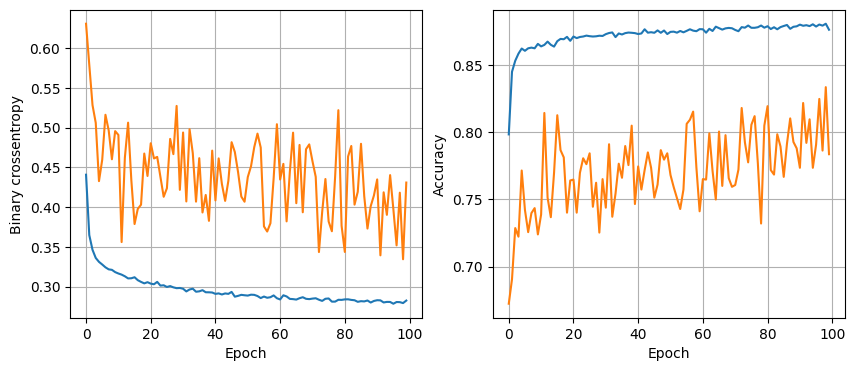

119/119 [==============================] - 1s 5ms/step - loss: 0.3243 - accuracy: 0.8722
16 nodes, dropout 0, lr 0.005, batch size 32


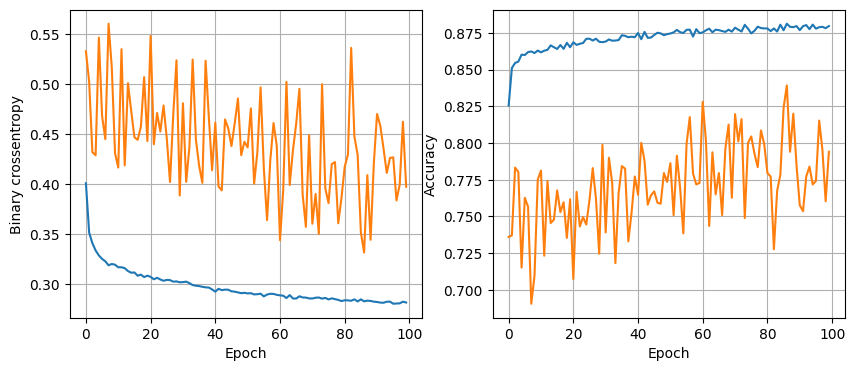

119/119 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.8704
16 nodes, dropout 0, lr 0.005, batch size 64


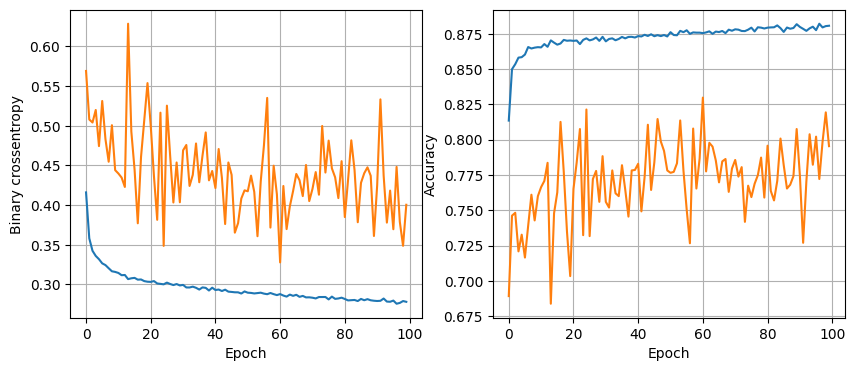

119/119 [==============================] - 0s 2ms/step - loss: 0.3308 - accuracy: 0.8696
16 nodes, dropout 0, lr 0.005, batch size 128


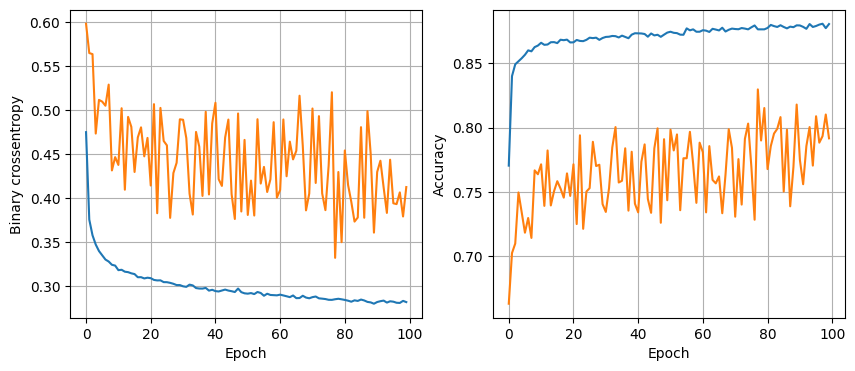

119/119 [==============================] - 0s 1ms/step - loss: 0.3185 - accuracy: 0.8707
16 nodes, dropout 0, lr 0.001, batch size 32


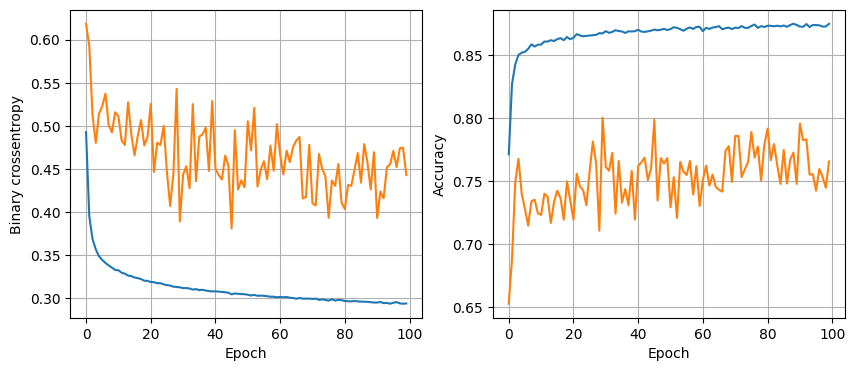

119/119 [==============================] - 0s 1ms/step - loss: 0.3191 - accuracy: 0.8736
16 nodes, dropout 0, lr 0.001, batch size 64


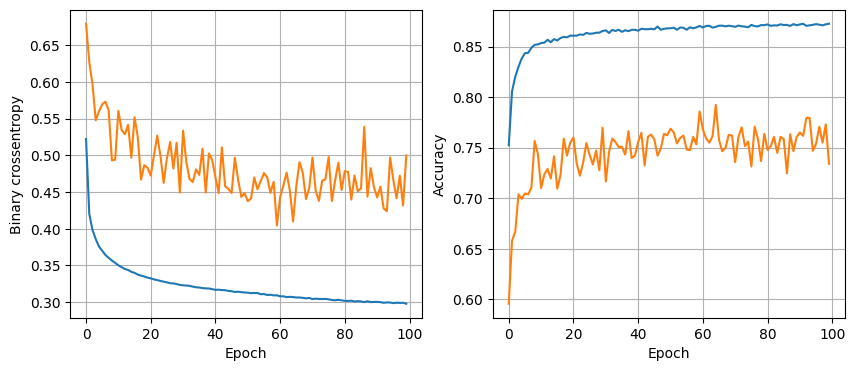

119/119 [==============================] - 0s 1ms/step - loss: 0.3227 - accuracy: 0.8675
16 nodes, dropout 0, lr 0.001, batch size 128


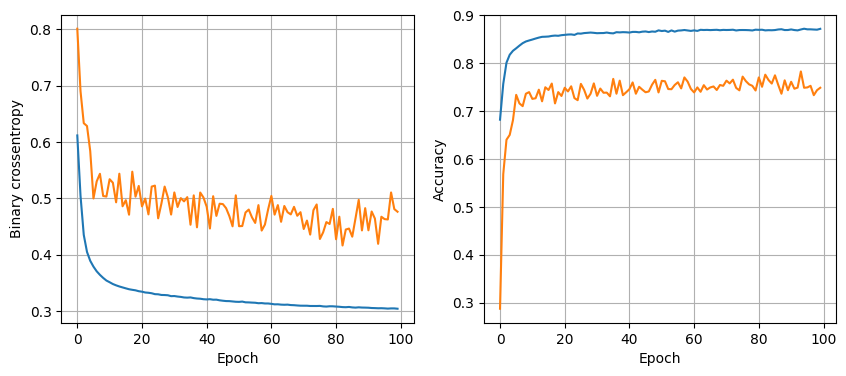

119/119 [==============================] - 0s 1ms/step - loss: 0.3241 - accuracy: 0.8680
16 nodes, dropout 0.2, lr 0.01, batch size 32


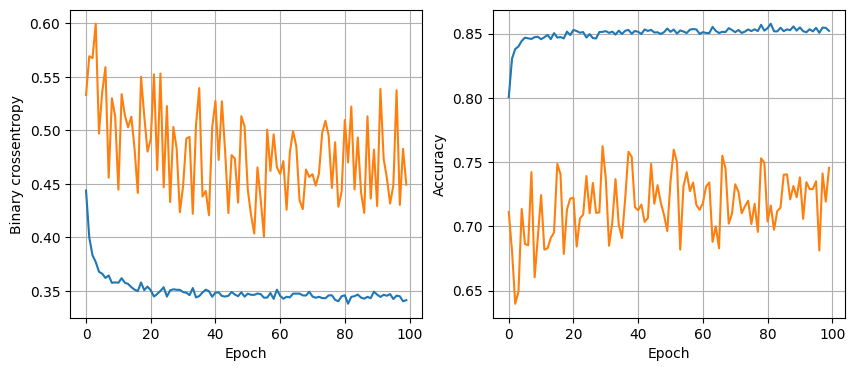

119/119 [==============================] - 0s 1ms/step - loss: 0.3328 - accuracy: 0.8680
16 nodes, dropout 0.2, lr 0.01, batch size 64


KeyboardInterrupt: 

In [55]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

In [ ]:
print(classification_report(y_test, y_pred))

0.41897696818854874


(array([236., 235., 239., 231., 244., 236., 250., 258., 252., 256., 244.,
        274., 234., 279., 236., 251., 260., 254., 256., 286., 259., 254.,
        263., 238., 246., 263., 229., 224., 257., 289., 254., 259., 219.,
        223., 238., 240., 238., 268., 257., 271.]),
 array([-9.99859369e+01, -9.49867678e+01, -8.99875987e+01, -8.49884295e+01,
        -7.99892604e+01, -7.49900913e+01, -6.99909222e+01, -6.49917530e+01,
        -5.99925839e+01, -5.49934148e+01, -4.99942457e+01, -4.49950765e+01,
        -3.99959074e+01, -3.49967383e+01, -2.99975692e+01, -2.49984000e+01,
        -1.99992309e+01, -1.50000618e+01, -1.00008927e+01, -5.00172354e+00,
        -2.55441880e-03,  4.99661471e+00,  9.99578383e+00,  1.49949530e+01,
         1.99941221e+01,  2.49932912e+01,  2.99924603e+01,  3.49916295e+01,
         3.99907986e+01,  4.49899677e+01,  4.99891368e+01,  5.49883059e+01,
         5.99874751e+01,  6.49866442e+01,  6.99858133e+01,  7.49849824e+01,
         7.99841516e+01,  8.49833207e+01, 

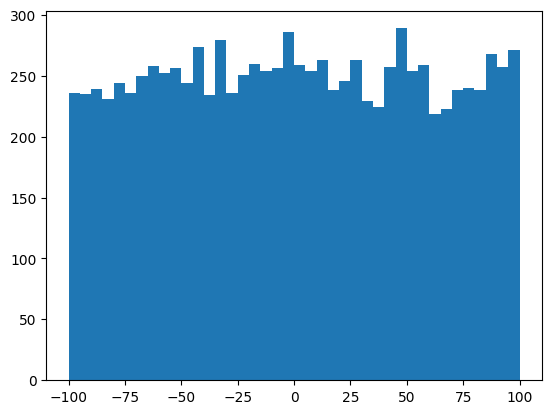

In [56]:
n = 10000
x = [np.random.uniform()*200 -100 for _ in range(n)]
print(np.mean(x))
plt.hist(x, bins = 40)

In [57]:
y = [np.random.normal(0, 57) for _ in range(n)]
print(np.mean(y))

0.04113157171873711


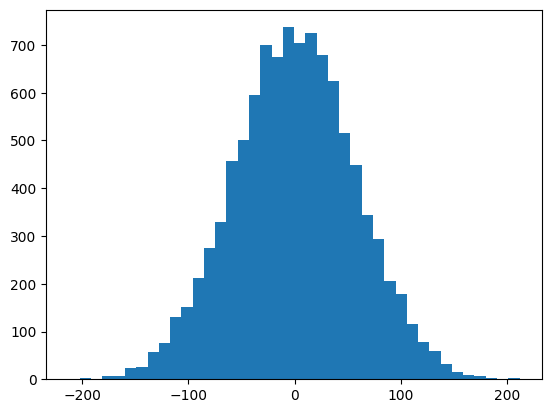

In [58]:
plt.hist(y, bins = 40)
plt.show()

In [59]:
normal_std = np.std(y)
uniform_std = np.std(x)
print('uniform standard: {}\nnormal standard: {}'.format(uniform_std, normal_std))

uniform standard: 57.32093228203578
normal standard: 57.11433641599382


In [62]:
import scipy.stats as stats

ttest = stats.ttest_ind(x, y)
ttest

Ttest_indResult(statistic=0.46692466501994034, pvalue=0.6405588646958142)

In [66]:
X = [1,2,3,4]
Y = [0,0]
np.hstack((X,Y))

array([1, 2, 3, 4, 0, 0])

In [73]:
np.reshape(X, (2,2))

array([[1, 2],
       [3, 4]])